In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [6]:
def generate_fishing_grounds(n_grounds = 10, x_max = 100, y_max = 100):
    return np.random.rand(n_grounds, 2) * np.array([x_max, y_max])

In [11]:
def generate_ships(n_ships = 10, x_max = 100, y_max = 100):
    return np.random.rand(n_ships, 2) * np.array([x_max, y_max])

In [12]:
grounds = generate_fishing_grounds()
ships = generate_ships()

In [21]:
def calculate_ship_distance_from_grounds(ships, grounds):
    return np.linalg.norm(ships[:, np.newaxis] - grounds, axis=2)

In [22]:
def calculate_ship_distance_from_ships(ships):
    return np.linalg.norm(ships[:, np.newaxis] - ships, axis=2)

In [49]:
def calculate_close_grounds(ships, grounds, distance_threshold = 10):
    ship_ground_distances = calculate_ship_distance_from_grounds(ships, grounds)
    close_array = calculate_ship_distance_from_grounds(ships, grounds) <= distance_threshold
    close_array = np.any(close_array, axis=0)
    
    # duplicate the close_array for each ship
    close_array = np.tile(close_array, (ships.shape[0], 1))
    
    # return the distances, 0 if the close_array is False
    ship_ground_distances = np.where(close_array, ship_ground_distances, 0)
    return ship_ground_distances

calculate_close_grounds(ships, grounds)

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
         84.45987011,  90.93307887],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
         56.29681326,  67.65924278],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
         19.58223084,  17.52748475],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
        103.33864539, 113.82159724],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
         50.98080303,  55.02538139],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          4.76284572,   8.30558587],
       [  

In [52]:
alpha = .01
calculate_close_grounds(ships, grounds) * np.exp(-(alpha)*calculate_ship_distance_from_grounds(ships, grounds)**2).round(5)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.23172008e-01, 8.11873093e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
   

In [16]:
distances = calculate_ship_distance_from_grounds(ships, grounds)

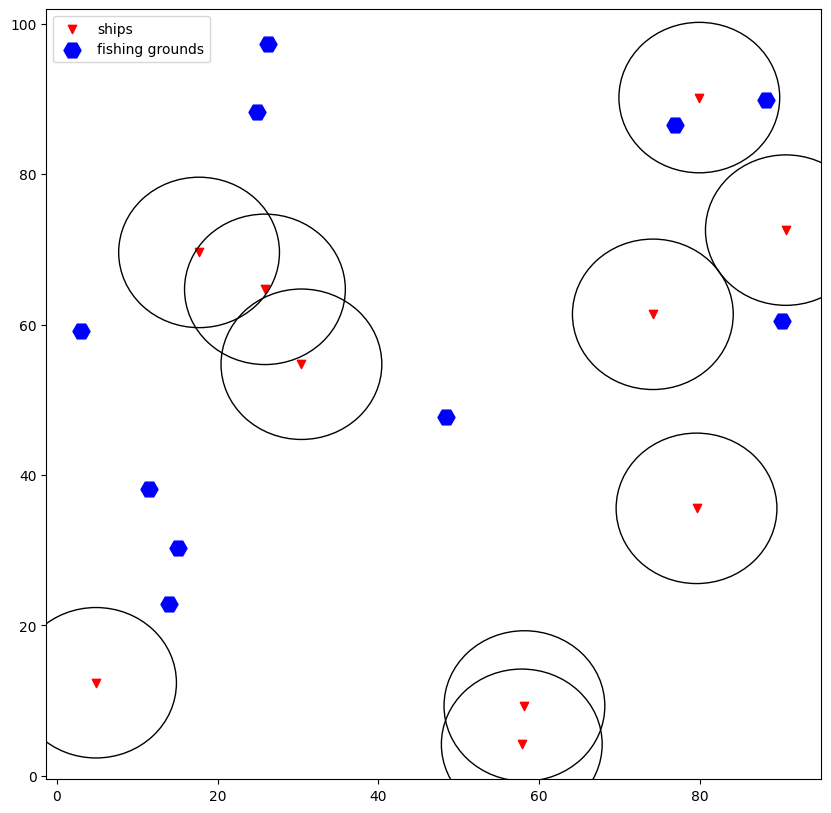

In [29]:
plt.figure(figsize=(10, 10))
# plot the ships and the fishing grounds
plt.scatter(ships[:, 0], ships[:, 1], c='red', label='ships', marker='v')
plt.scatter(grounds[:, 0], grounds[:, 1], c='blue', label='fishing grounds', marker='H', s=150)

# add a circle around the ships with a given radius
radius = 10
for ship in ships:
    plt.gca().add_artist(plt.Circle(ship, radius, fill=False))


plt.legend()
plt.show()